<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Histogram" data-toc-modified-id="Histogram-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Histogram</a></span>
            <ul class="toc-item"><li><span><a href="#Histogram-Gray" data-toc-modified-id="Histogram-Gray-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Histogram Gray</a></span></li>
                <li><span><a href="#Histogram-Equalization" data-toc-modified-id="Histogram-Equalization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Histogram Equalization</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#적용-전" data-toc-modified-id="적용-전-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>적용 전</a></span></li>
                        <li><span><a href="#적용-후" data-toc-modified-id="적용-후-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>적용 후</a></span></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><span><a href="#Image-Threshold" data-toc-modified-id="Image-Threshold-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Threshold</a></span>
            <ul class="toc-item">
                <li><span><a href="#Simple-Threshold" data-toc-modified-id="Simple-Threshold-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple Threshold</a></span></li>
                <li><span><a href="#Adaptive-Threshold" data-toc-modified-id="Adaptive-Threshold-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Adaptive Threshold</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Image-Smoothing" data-toc-modified-id="Image-Smoothing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Smoothing</a></span>
            <ul class="toc-item">
                <li><span><a href="#Average-filter" data-toc-modified-id="Average-filter-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Average filter</a></span></li>
                <li><span><a href="#Gaussian-filter" data-toc-modified-id="Gaussian-filter-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gaussian filter</a></span></li>
                <li><span><a href="#Median-filter" data-toc-modified-id="Median-filter-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Median filter</a></span></li>
                <li><span><a href="#여러가지-필터-비교" data-toc-modified-id="여러가지-필터-비교-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>여러가지 필터 비교</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Image-Gradients" data-toc-modified-id="Image-Gradients-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Gradients</a></span>
        </li>
    </ul>
</div>

# Histogram

* It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.
* By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. 

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**  
Parameters:	
- image – 분석대상 이미지(uint8 or float32 type). Array형태.
- channels – 분석 채널(X축의 대상). 이미지가 graysacle이면 [0], color 이미지이면 [0],[0,1] 형태(1 : Blue, 2: Green, 3: Red)
- mask – 이미지의 분석영역. None이면 전체 영역.
- histSize – BINS 값. [256]
- ranges – Range값. [0,256]

## Histogram Gray

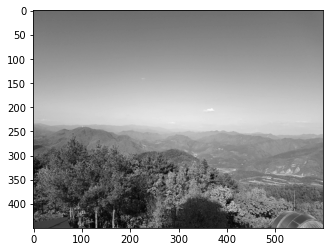

hist.shape: (256, 1)
hist.sum(): 270000.0 img.shape: (450, 600)


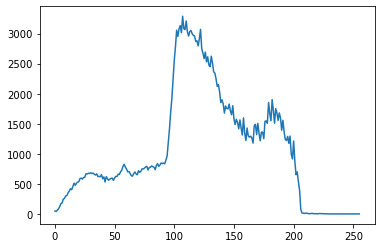

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 그레이 스케일로 읽기 및 출력
img = cv2.imread('./picture/mountain.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,'gray')
plt.show()

#--② 히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,255])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) #--④ 히스토그램 총 합계와 이미지의 크기
plt.show()

## Histogram Equalization


* Consider an image whose pixel values are confined to some specific range of values only. But a good image will have pixels from all regions of the image.
* So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). 
* This normally improves the contrast of the image.

CDF(Cumulative Distribution Function, 누적 분포 함수)  
 : 어떤 확률 분포에 대해서 확률 변수가 특정 값보다 작거나 같은 확률을 나타냄 

### 적용 전

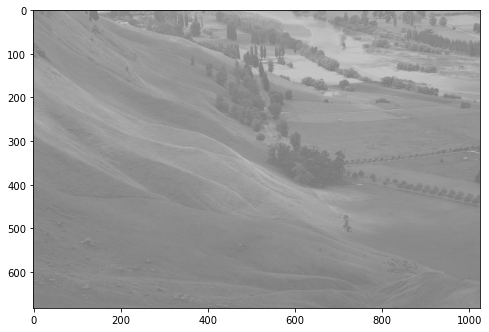

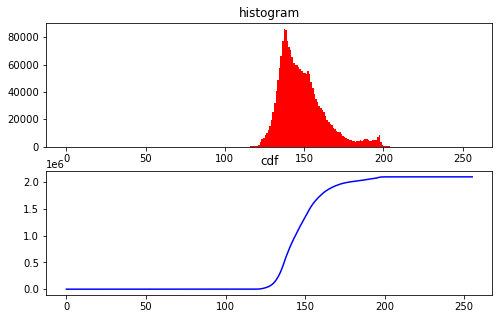

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('picture/hawkes.jpg',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img) # 이미지 출력

# 히스토그램 구하기
hist,bins = np.histogram(img.flatten(),256,[0,256])

# CDF(누적분포함수) 구하기
cdf = hist.cumsum()

## histogram
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.title('histogram')
plt.hist(img.flatten(),256,[0,256], color = 'r')

## cdf
plt.subplot(2,1,2),
plt.title('cdf')
plt.plot(cdf, color = 'b')
plt.savefig('histogram_before.png') # 히스토그램 저장
plt.show()


### 적용 후

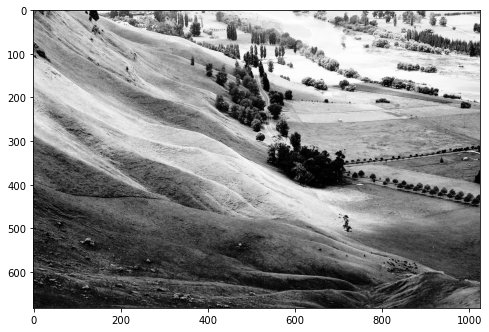

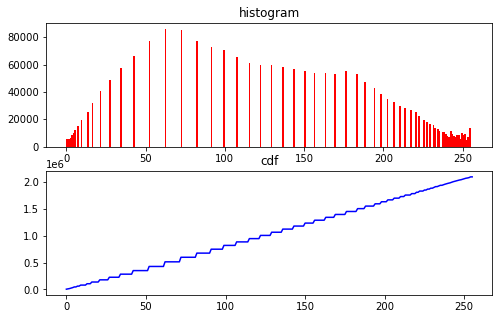

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('picture/hawkes.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

# History Equalization 공식
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img2) # 이미지 출력

## histogram
plt.figure(figsize=(8,5)) 
plt.subplot(2,1,1)
plt.title('histogram')
plt.hist(img2.flatten(),256,[0,256], color = 'r')

## cdf
hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()

plt.subplot(2,1,2),
plt.title('cdf')
plt.plot(cdf2, color = 'b')
plt.savefig('histogram_after.png') # 히스토그램 저장
plt.show()


# Image Threshold

## Simple Threshold
cv2.threshold(src,tresh,maxval,type) -->  retval, dst

retval : otsu의 이진화와 관련

Parameter: 
- src: input image로 single-channel image (grayscale을 사용)
- thresh: 임계값
- maxval: 임계값을 넘었을 때 적용할 value (흑백의 경우 255)
- type: thresholding type

Thresholding Type: 
- *cv2.THRESH_BINARY*             : 픽셀값이 threshold_value보다 크면 1, 작으면 0
- *cv2.THRESH_BINARY_INV*         : 픽셀값이 threshold_value보다 크면 0, 작으면 1 
- *cv2.THRESH_BINARY_TRUNC*       : 픽셀값이 threshold_value보다 크면 threshold_value, 작으면 픽셀값 그대로  
- *cv2.THRESH_BINARY_TOZERO*      : 픽셀값이 threshold_value보다 크면 픽셀값 그대로, 작으면 0 
- *cv2.THRESH_BINARY_TOZERO_INV*  : 픽셀값이 threshold_value보다 크면 0, 작으면 픽셀값 그대로  


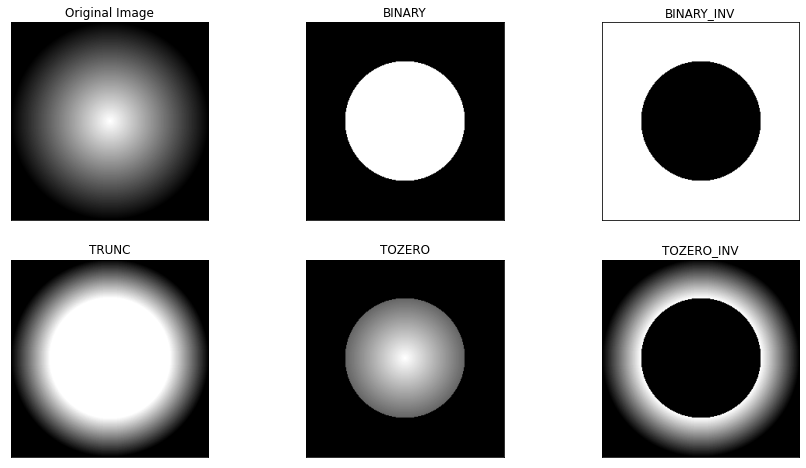

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./picture/radial_gradient.png',0)
#img = cv2.imread('./picture/len_top.jpg',0)

# threshold 값 설정
t = 100

ret,thresh1 = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img, t, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img, t, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img, t, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img, t, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,8)) ## 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

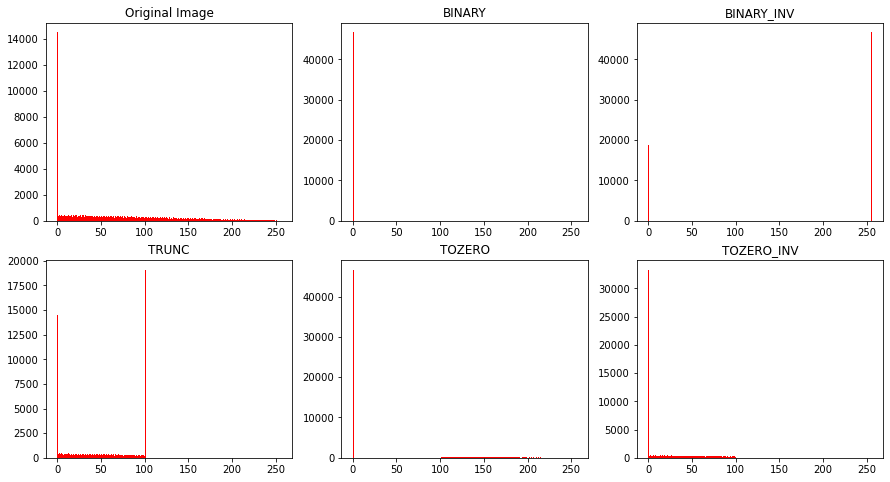

In [10]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,8)) ## 
for i in range(6):
    plt.subplot(2,3,i+1)
#     plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.hist(images[i].flatten(),256,[0,256], color = 'r')

plt.show()

## Adaptive Threshold
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C) = dst

Parameters:
- src: grayscale image
- maxValue: 임계값을 넘었을 때 적용할 value
- adaptiveMethod: threshold value를 찾기 위해 계산하는 방법
- thresholdType: threshold type
- blockSize: thresholding을 적용할 영역 크기
- C: Mean이나 gaussian mean에서 차감할 값

AdaptiveMethod:
- *cv2.ADAPTIVE_THRESH_MEAN_C*: block size 내의 각 픽셀 값의 평균을 threshold로 사용
- *cv2.ADAPTIVE_THRESH_GAUSSIAN_C*: block size에 맞게 gaussian filter를 생성해 wegited sum을 threshold로 사용

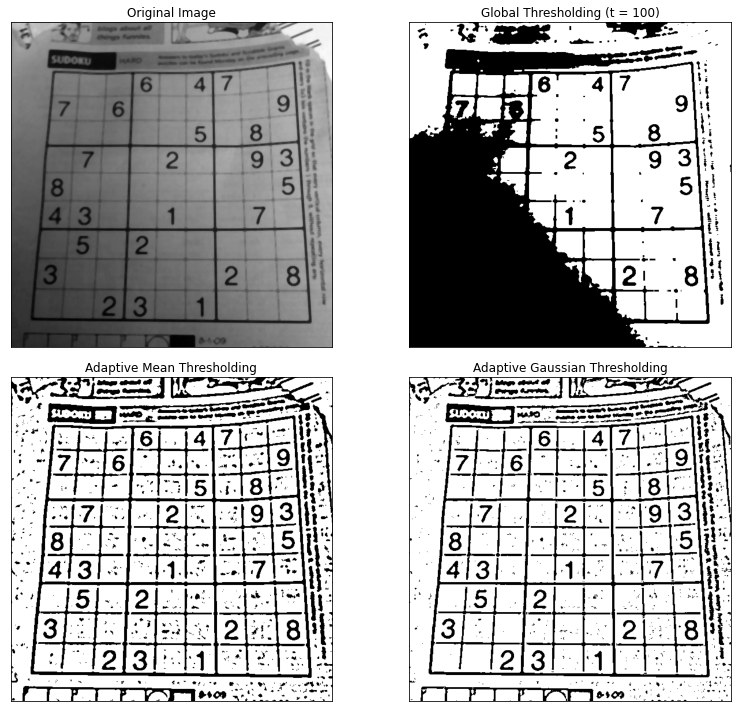

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./picture/sudoku.png',0)
img = cv2.medianBlur(img,5)

# threshold 값 설정
t = 100

# Global Thresholding
ret,th1 = cv2.threshold(img,t,255,cv2.THRESH_BINARY)

# Adaptive Thresholding(MEAN)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)

# Adaptive Thresholding(GAUSSIAN)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

titles = ['Original Image', 'Global Thresholding (t = 100)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

# Image Smoothing
cv2.blur(src,ksize) = dst

Parameters:
- src: input image
- ksize: kernel size (ex: (3,3))

cv2.GaussianBlur(img, ksize, sigmaX) = dst

Parameters:
- img: input image
- ksize: kernel size (ex: (3x3))
- sigmaX: Gaussian kernel standard deviation in X direction

cv2.medianBlur(src, ksize) = dst

Parameters:
- src: input image
- ksize: odd number larger than 1

## Average filter

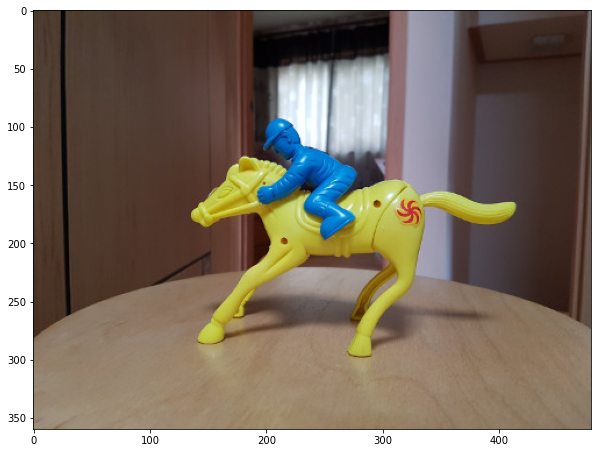

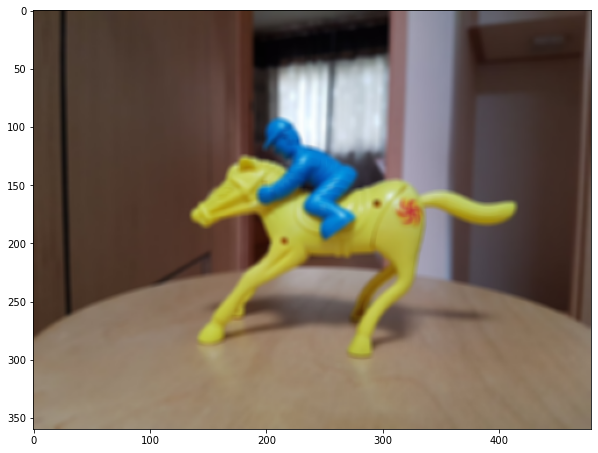

In [12]:
import cv2
import numpy as np

img = cv2.imread('picture/pump_horse.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
l = 5

# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((l,l))/l**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력
plt.figure(figsize=(10,10)) 
plt.imshow(img)
plt.show()

plt.figure(figsize=(10,10)) 
plt.imshow(blured) 
plt.show()


## Gaussian filter

k1: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
k2: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


True

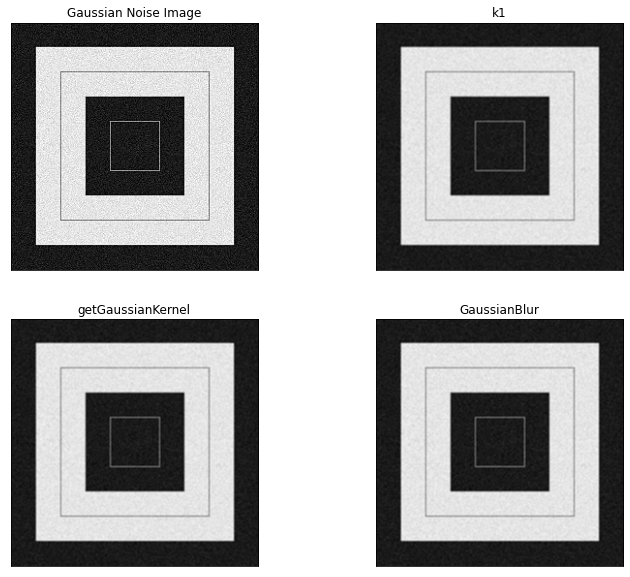

In [13]:
import cv2
import numpy as np

img = cv2.imread('picture/gaussian_noise.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 가우시안 커널을 직접 생성해서 블러링  ---①
k1 = np.array([[1, 2, 1],
               [2, 4, 2],
               [1, 2, 1]]) *(1/16)
blur1 = cv2.filter2D(img, -1, k1)

# 가우시안 커널을 API로 얻어서 블러링 ---②
k2 = cv2.getGaussianKernel(3, 0)
blur2 = cv2.filter2D(img, -1, k2*k2.T)

# 가우시안 블러 API로 블러링 ---③
blur3 = cv2.GaussianBlur(img, (3, 3), 0)

# 결과 출력
print('k1:', k1)
print('k2:', k2*k2.T)

titles = ['Gaussian Noise Image', 'k1', 'getGaussianKernel', 'GaussianBlur']
images = [img, blur1, blur2, blur3]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

cv2.imwrite('before_gaussian_noise.jpg',img)
cv2.imwrite('after_gaussian_noise.jpg',blur1)

## Median filter

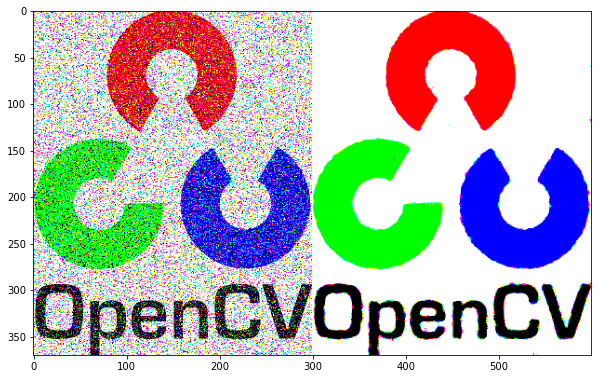

In [14]:
import cv2
import numpy as np
from skimage.util import random_noise

img = cv2.imread("picture/logo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# 미디언 블러 적용 --- ①
blur = cv2.medianBlur(noise_img, 5)

# 결과 출력 
merged = np.hstack((noise_img,blur))
plt.figure(figsize=(10,10)) 
plt.imshow(merged)
plt.show()
